# Plot Scatter Demo

This demo illustrates use of PARETO's visualization method `plot_scatter()`. Two different formats of source data can be used to create a scatter plot:

__1. [Data from Excel files](#example_1)__

   - Data can be loaded from an Excel workbook with PARETO's `get_data()` utility function. The names of the sheets in the workbook should correspond to variable names. Each data column in a sheet should have a descriptive header. The column headers are important as they are used to detect whether the data is indexed by time and also for specifying which column a user would like the plot to be grouped by. The last column in a data sheets should always contain the values of the data; the remaining columns should have the corresponding indexes.
   - Refer to [Working With Data Indexed by Time](#section_3.1) for some examples of how you can set-up these Excel sheets.<br><br>

__2. [Data from PARETO models](#example_2)__

   - PARETO's `generate_report()` method returns a dictionary containing variables and the data associated with them. Data in this format is already formatted for use in `plot_scatter()`.

### `plot_scatter()` Arguments

The plotting function is called as `plot_scatter(input_data, args)`. The two input arguments are described below:

1. __`input_data`__:
The first argument is a dictionary that contains the information required to build the scatter plot. Different options provide data and labels for use in `plot_scatter()`. This Jupyter notebook provides two examples describing the combination of `input_data` requirements depending on the source of the data. Refer to [PARETO Scatter Plot Method plot_scatter() Parameters](#section_3.2) for more information.<br><br>

2. __`args`__:
The second argument is a dictionary containing options for customizing the scatter plot. Below is a list of keys that can be included in the `args` dictionary and the possible values for each:

  - __`plot_title`__ - This value will be used as the title of the plot. If not provided, the plot will be given a blank title.

  - __`group_by`__: This specifies what column will be used as the x-axis in the plot; therefore it must be typed (or copied) exactly as it is in the column header of the data. If not provided, the plot will be grouped by the first column in the data by default. The possible values for this argument are dependent on the data that is provided.
     - For example, if the column headers/labels are ("Origin, "Destination", "Time", "Value"), then the possible values for this argument are: "Origin" or "Destination" ("Time" is not a valid choice).

  - __`output_file`__: This parameter is used for creating the file that contains the scatter plot generated by this method. This will be the name and the type of the file that contains the plot.
     - The possible file extensions are ".html", ".png", ".jpg", ".jpeg", ".svg", and ".pdf" (if not provided, the file name and extension default to "first_scatter_plot.html").

  - __`print_data`__: This specifies if the user would like the dataframe produced by the `plot_scatter()` method to be displayed in the console. This is useful for verifying that the data is correct. This argument is a boolean (`True` or `False`). If not provided, the default is `False`.

 - __`group_by_category`__: This specifies if the user would like the different types of locations being used in the data to be categorized by color. The colors are randomly assigned by using the qualitative "T10" discrete color palette provided by Plotly (see [Plotly documentation](https://plotly.com/python/discrete-color/) for more information). There are two types of input that can be provided for this argument:
     - Boolean (`True` or `False`): `True` will group the locations based on the abbreviated descriptor (N for N01, K for K01, CP for CP01, etc.). `False`, the default value, will cause each individual marker on the scatter plot to be a different color (until the color palette has to repeat the colors).
     - Category Excel data: An Excel sheet with 2 columns corresponding to the location and a descriptor for the category can be provided. Refer to [PARETO Scatter Plot Method plot_scatter() Group By Category Data](#section_3.3) more information.

  - __`jupyter_notebook`__: Setting this paramter to `True` causes the plot to be displayed if the running environment is a Jupyter notebook.

<div class="alert alert-block alert-warning">
<b>Warning:</b> Please note that the input data options are case sensitive.
</div>

<a id="example_1"></a>
# 1: Visualizing Data From Excel Files
Below are some examples of scatter plots that were created with the `get_data()` output format:

### 1.1 Animated Plot
The first example will show how to create an animated plot with the following argument options:
 - Setting the specific plot title with: `"plot_title": "Trucked Water"`
 - Grouping the data by the column named "Destination": `"group_by": "Origin"`
 - Specifying the name of the file and type of file with the argument: `"output_file": "demo_scatter.html"`
 - Specifying that we would not like to print the data in the console: `"print_data": False"`
 - Specifying that we want to group the data to be color categorized by the data we provide with: `"group_by_category": df_parameters["plot_scatter_Categories"]`
 - Display the plot in Jupyter: `"jupyter_notebook": True`

__Step 1: Importing files and running `get_data()`__

In [ ]:
from pareto.utilities.results import plot_scatter
from pareto.utilities.get_data import get_data

# Import library to allow plots to be embedded in Jupyter Notebook 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

set_list = []
parameter_list = ["test_plot_scatter_y", "test_plot_scatter_x",
                  "test_plot_scatter_y_static", "test_plot_scatter_x_static",
                  "test_plot_scatter_size", "plot_scatter_Categories"]
fname = 'visualization_test_data.xlsx'
[df_sets, df_parameters] = get_data(fname, set_list, parameter_list, sum_repeated_indexes=True)

Note: The `sum_repeated_indexes` argument which is passed to `get_data()` above causes the values for any repeated indexes in the data to be added together. The default value fot this argument is `False`.

__Step 2: Setting up the parameters and running `plot_scatter()`__

In [ ]:
args = {"plot_title": "Trucked Water", 
        "group_by": "Origin",  
        "output_file": "demo_scatter.html", 
        "print_data": False, 
        "group_by_category": df_parameters["plot_scatter_Categories"],
        "jupyter_notebook": True}

# We provide "labels" since they are required for this data format
input_data = {"pareto_var_x": df_parameters["test_plot_scatter_x"], 
              "pareto_var_y": df_parameters["test_plot_scatter_y"], 
              "size": df_parameters["test_plot_scatter_size"], 
              "labels_x": [("Origin", "Destination", "Time", "Trucked Water")],
              "labels_y": [("Origin", "Destination", "Time", "Cost of Trucked Water")],
              "labels_size": [("Origin", "Destination", "Time", "Size")]
              }

plot_scatter(input_data, args)

### 1.2 Static Plot

This example will show how to create a static plot with the following argument options:
 - Using the default plot title value (blank title) by not providing `"plot_title"`
 - Using the default group_by setting (first column in data) by not providing the argument: `"group_by"`
 - Specifying that the output file should be a jpg: `"output_file": "demo_scatter.jpg"`
 - Specifying that we would like to print the data in the console: `"print_data": True`
 - Specifying that we would like the data to be color categorized by the type of location with: `"group_by_category": True`
 - Display the plot in Jupyter: `"jupyter_notebook": True`

In [ ]:
# Using the imports from the above cells
args = {"output_file": "demo_scatter.jpg",
        "print_data": True,
        "group_by_category": True,
        "jupyter_notebook": True}

# We provide "labels" since they are required for this data format
input_data = {"pareto_var_x": df_parameters["test_plot_scatter_x_static"],
              "pareto_var_y": df_parameters["test_plot_scatter_y_static"],
              "labels_x": [("Origin", "Destination", "Trucked Water")],
              "labels_y": [("Origin", "Destination", "Cost of Trucked Water")]
              }

plot_scatter(input_data, args)

<a id="example_2"></a>
# 2: Visualizing Optimization Model Results
Below are some examples of how to use results from an optimized PARETO model with the `generate_report()` method to create scatter plots.

### 2.1 Animated Plot
The first example will show how to create an animated plot using the optimized model with the following argument options:
 - Setting the specific plot title with: `"plot_title": "Trucked Water"`
 - Specifying that we would like to group by the Origin locations: `"group_by": "Origin"`
 - Specifying the name of the file and type of file with the argument: `"output_file": "demo_scatter2.html"`
 - Using the default print_data setting (no printing) by not providing the argument: `"print_data"`
 - Display the plot in Jupyter: `"jupyter_notebook": True`

__Step 1: Importing files and setting up the parameter and set lists__

In [ ]:
from pareto.operational_water_management.operational_produced_water_optimization_model import (
    WaterQuality,
    create_model,
    ProdTank,
)
from pareto.utilities.results import generate_report, PrintValues
from pareto.utilities.solvers import get_solver, set_timeout
from importlib import resources

# Tabs in the input Excel spreadsheet
set_list = [
    "ProductionPads",
    "CompletionsPads",
    "ProductionTanks",
    "FreshwaterSources",
    "StorageSites",
    "SWDSites",
    "TreatmentSites",
    "ReuseOptions",
    "NetworkNodes",
]
parameter_list = [
    "Units",
    "RCA",
    "FCA",
    "PCT",
    "FCT",
    "CCT",
    "PKT",
    "PRT",
    "CKT",
    "CRT",
    "PAL",
    "CompletionsDemand",
    "PadRates",
    "FlowbackRates",
    "ProductionTankCapacity",
    "DisposalCapacity",
    "CompletionsPadStorage",
    "TreatmentCapacity",
    "FreshwaterSourcingAvailability",
    "PadOffloadingCapacity",
    "TruckingTime",
    "DisposalOperationalCost",
    "TreatmentOperationalCost",
    "ReuseOperationalCost",
    "PadStorageCost",
    "PipelineOperationalCost",
    "TruckingHourlyCost",
    "FreshSourcingCost",
    "ProductionRates",
    "TreatmentEfficiency",
    "PadWaterQuality",
    "StorageInitialWaterQuality",
]

__Step 2: Setting file name, passing file into `get_data()`, and creating the operational model__

In [ ]:
# Load data
with resources.path(
    "pareto.case_studies", "operational_generic_case_study.xlsx"
) as fpath:
    [df_sets, df_parameters] = get_data(fpath, set_list, parameter_list)

# Additional input data
df_parameters["MinTruckFlow"] = 75
df_parameters["MaxTruckFlow"] = 37000

# Create mathematical model
operational_model = create_model(
    df_sets,
    df_parameters,
    default={
        "has_pipeline_constraints": True,
        "production_tanks": ProdTank.equalized,
        "water_quality": WaterQuality.false,
    },
)
operational_model.proprietary_data = False

__Step 3: Solve and optimize the model__

In [ ]:
# Initialize pyomo solver
opt = get_solver("gurobi_direct", "gurobi", "cbc")
set_timeout(opt, timeout_s=60)

# Solve mathematical model
results = opt.solve(operational_model, tee=True)
results.write()

__Step 4: Run `generate_report()`__

In [ ]:
[model, results_dict] = generate_report(
    operational_model,
    is_print=PrintValues.essential,
    fname=None,
)

__Step 5: Setting up the parameters and using the returned data from `generate_report()` to run `plot_scatter()`__

In [ ]:
args = {"plot_title": "Trucked Water", 
        "group_by": "Origin",  
        "output_file": "demo_scatter2.html",
        "jupyter_notebook": True
       } 

# Notice there are no labels provided since they are not required for the generate_report output format
input_data = {"pareto_var_x": results_dict["v_F_Trucked_dict"], 
              "pareto_var_y": results_dict["v_C_Trucked_dict"], 
              }

plot_scatter(input_data, args)

# 3. Additional Information:
<a id="section_3.1"></a>
## 3.1 Working With Data Indexed by Time
Notice that the data in the below image includes a column that has a header named "Time" which is what allows the method to detect that the data is indexed by time and therefore should create an animated plot:

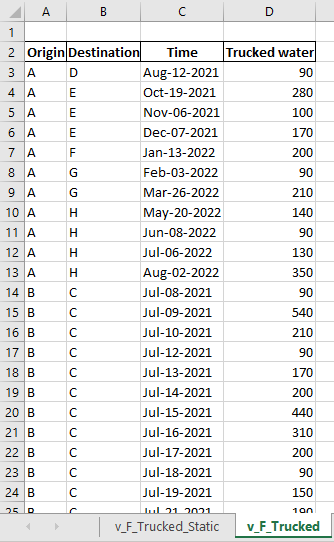

The Time column can be formatted in a few ways:
- __Full Dates__:
   - These can be formatted with forward slashes or dashes, as long as the day, month and year have been provided.
        - __Year__ - The year should always be entered with all 4 digits so that the system is not confused about which value is the year when using any of the various naming conventions. For example, use "2022" instead of "22".
        - __Month__ - The month can be the actual name of the month if preferred but it will not appear on the plot with the full name and will instead be abbreviated. The month can be the numerical value of the month, the abbreviated name of the month, or the full name of the month. For example, if we are using December, the possible values are: "12", "Dec", or "December".
        - __Day__ - The day will always be the numerical value and should be placed logically so as to not confuse the system. For example, "2022/30/12" is not a normal structure for a date. Instead, it should be either "12/30/2022" or "2022/12/30".
   - There are many combinations that can be used, but we suggest using one of the following naming conventions for full dates: 
        - 2022/12/30 or 2022-12-30
        - 12/30/2022 or 12-30-2020
        - December/30/2022 or December-30-2022
        - 2022/December/30 or 2022-December-30
        - Dec/30/2022 or Dec-30-2022
        - 30/Dec/2022 or 30-Dec-2022
   - Please refer to [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) for more details on how full dates can be formatted for `plot_scatter()`.
- __One Letter Time Periods:__
  - These must be formatted with exactly one letter before the number of the time period. Although any letter can be used, we suggest using the following convention:
      - T1 or T01 (time period), M1 or M01 (month), Y1 or Y01 (year), D1 or D01 (day)

<a id="section_3.2"></a>
## 3.2. PARETO Scatter Plot Method `plot_scatter()` Parameters
Input data for `plot_scatter()` can be loaded in two different ways which were demonstrated above:
1. Importing data from an Excel workbook with `get_data()`.
2. Using data from a solved PARETO model with `generate_report()`.

Below is more info about the `input_data` parameter.

### PARETO Scatter Plot Method plot_scatter() Group By Category Data 
Below is an example of the Excel data that can be provided to specify how you would like the colors of the plot markers to be categorized. This approach is best for when there are nodes in a region that you would like to categorize together even if they may not be of the same type (completions pad, production pad, etc.). The category values can be strings or integers and both types can be used within the same data set, although the following figure shows only strings being used:

![GroupByCategories.png](attachment:GroupByCategories.png)

### Input Data
The second parameter passed into `plot_scatter()` is `"input_data"` which is a dictionary with the following keys:
 - __`"pareto_var_x"`__ (required): This key contains the data for the x-axis of the plot. For example:
     - `[df_sets, df_parameters] = get_data(fname, set_list, parameter_list)` returns df_parameters, which contains a dictionary of the variable names and their data. So if `v_F_Trucked` is the data we want to use for the x-axis, we would set `input_data["pareto_var_x"] = df_parameters["v_F_Trucked"]`.
 - __`"pareto_var_y"`__ (required): This key contains the data for the y-axis of the plot. It is set similarly to `pareto_var_x`.
 - __`"labels_x"`__ (only required for option 1, loading data from Excel): These labels are used to head the x-axis data. These labels should match the headings of the data in the Excel sheets. If using data generated by `generate_report()` (option 2), these labels do not have to be provided. You must provide a tuple of the labels like the following:
     - If the data being passed into `plot_scatter()` contains rows of an Origin, Destination, Time and the amount of Trucked Water, then the value to be assigned to `"labels"` should be something like: `[("Origin", "Destination", "Time", "Trucked Water")]`. The value column of the data can be given any label desired. All columns preceding the value column are case sensitive and could be used by the `"group_by"` argument (excluding the "Time" column).
 - __`"labels_y"`__ (only required for option 1, loading data from Excel): These labels are used to head the y-axis data. These labels should match the headings of the data in the Excel sheets. The way that `labels_y` is set is analagous to `labels_x`.
 - __`"size"`__: `plot_scatter()` allows the user to specify how the size of the plot markers should be calculated. There are three options that can be provided to specify the size of the markers:
     - `"x/y"`: Divide the x values by the y values to calculate the marker sizes. Note that this option has the potential to cause a division by zero error for a data point with a nonzero x value and a zero y value.
     - `"y/x"`: The inverse of the `"x/y"` ratio described above.
     - PARETO variable: The user can provide data in the form of an Excel sheet that has the same rows of data as the variables used for the x- and y-axes with an integer value in the value column that corresponds to the size of the markers.
 - __`"labels_size"`__ (required when providing a PARETO variable for marker sizes): These are the labels that will be used to head and describe the size data. These labels should match the headings of the data in the Excel sheets. 
 
<div class="alert alert-block alert-warning">
<b>Warning:</b> Please note that the input data options are case sensitive.
</div>
 
```Python 
# Example 1 (plot Excel data):
input_data = {"pareto_var_x": df_parameters["v_F_Trucked_dict"], 
              "pareto_var_y": df_parameters["v_C_Trucked_dict"], 
              "size": df_parameters["test_plot_scatter_size"], # optional
              "labels_x": [("Origin", "Destination", "Time", "Trucked Water")],
              "labels_y": [("Origin", "Destination", "Time", "Cost of Trucked Water")],
              "labels_size": # only required if PARETO variable was provided for size
              }
    
# Example 2 (plot solved model data):
input_data = {"pareto_var_x": results_dict["v_F_Trucked_dict"], 
              "pareto_var_y": results_dict["v_C_Trucked_dict"], 
              "size": "y/x", # optional
              "labels_x": # not required,
              "labels_y": # not required,
              "labels_size": # only required if PARETO variable was provided for size
              }
```